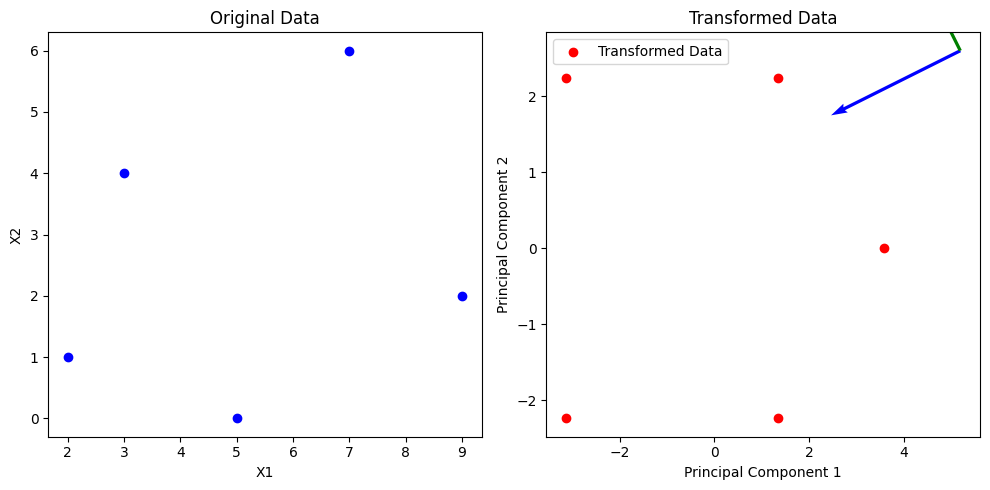

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
data = np.array([(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c='blue', label='Original Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original Data')
pca = PCA(n_components=2)
pca.fit(data)
transformed_data = pca.transform(data)
plt.subplot(1, 2, 2)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c='red', label='Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Transformed Data')
plt.quiver(*pca.mean_, *pca.components_[0], color=['b'], scale=3)
plt.quiver(*pca.mean_, *pca.components_[1], color=['g'], scale=3)
plt.legend()
plt.tight_layout()
plt.show()

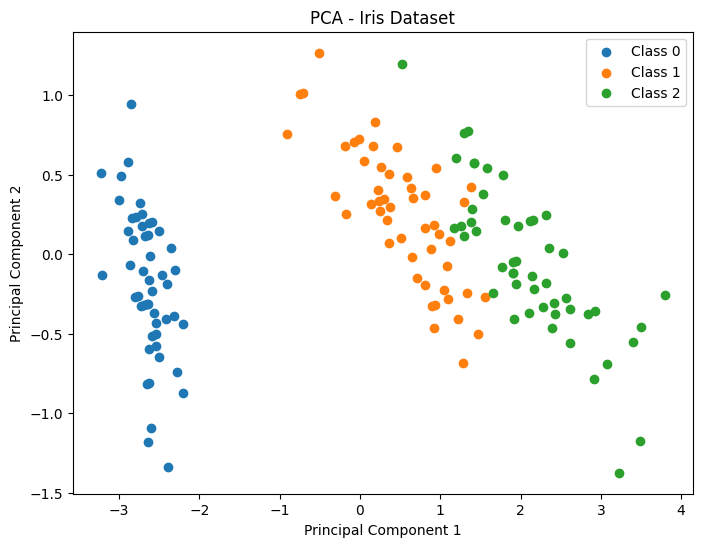

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
mean_vec = np.mean(X, axis=0)
centered_X = X - mean_vec
cov_mat = np.cov(centered_X, rowvar=False)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
sorted_indices = np.argsort(eig_vals)[::-1]
sorted_eig_vals = eig_vals[sorted_indices]
sorted_eig_vecs = eig_vecs[:, sorted_indices]
k = 2  
projection_matrix = sorted_eig_vecs[:, :k]
transformed_X = centered_X.dot(projection_matrix)
plt.figure(figsize=(8, 6))
for target in np.unique(y):
    plt.scatter(transformed_X[y == target, 0],
                transformed_X[y == target, 1],
                label=f'Class {target}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Iris Dataset')
plt.legend()
plt.show()